In [1]:
#import model building libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

## Image preprocessing

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#2.configure image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
#3.Apply image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r'D:\SmartBridge\VIT_morning_slot\dataset\Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'D:\SmartBridge\VIT_morning_slot\dataset\Testing',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [5]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


# Model Building

In [6]:
#2.initializing the model
model=Sequential()

In [9]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [11]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
#add flatten layer  ---input of ann
model.add(Flatten())

In [13]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))

In [14]:
#add output layer
model.add(Dense(units=4,activation="softmax"))

In [15]:
#Compile the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [17]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
model.fit(x_train,steps_per_epoch=39,epochs=5,validation_data=x_test,validation_steps=10)

Epoch 1/5
39/39 [==============================] - 30s 754ms/step - loss: 0.9663 - accuracy: 0.6147 - val_loss: 0.8186 - val_accuracy: 0.6406
Epoch 2/5
39/39 [==============================] - 28s 707ms/step - loss: 0.7774 - accuracy: 0.7011 - val_loss: 0.6577 - val_accuracy: 0.7688
Epoch 3/5
39/39 [==============================] - 22s 553ms/step - loss: 0.6759 - accuracy: 0.7326 - val_loss: 0.5147 - val_accuracy: 0.8219
Epoch 4/5
39/39 [==============================] - 21s 528ms/step - loss: 0.6165 - accuracy: 0.7674 - val_loss: 0.6247 - val_accuracy: 0.7969
Epoch 5/5
39/39 [==============================] - 25s 635ms/step - loss: 0.5560 - accuracy: 0.7973 - val_loss: 0.4322 - val_accuracy: 0.8562


In [ ]:
steps per epoch=no.of samples in your trainingset/batch size
1238/32=38.6=39

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

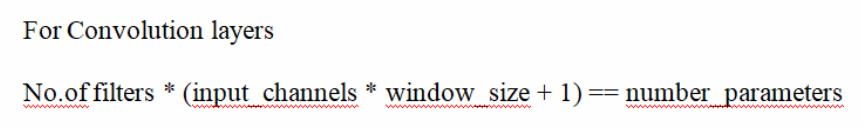

In [19]:
32 * (3*(3*3)+1)

896

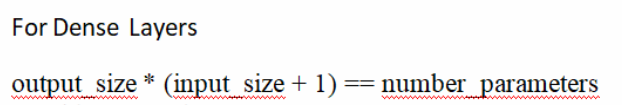

In [22]:
#dense
128*(30752+1)

3936384

In [23]:
# dense_1 (Dense) 
4*(128+1)

516

In [24]:
#save our model
model.save("animal.h5")

C:\Users\Tulasi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Test the model

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [27]:
import tensorflow as tf

In [39]:
model=tf.keras.models.load_model(r"D:\SmartBridge\VIT_morning_slot\animal.h5",compile=False)

In [42]:
#D:\SmartBridge\VIT_morning_slot\dataset\Testing\elephants\nature_3306013__340.jpg
img=image.load_img(r"D:\SmartBridge\VIT_morning_slot\elephant_test.jpg",target_size=(64,64))

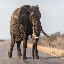

In [43]:
img

In [44]:
x=image.img_to_array(img)

In [45]:
x

array([[[229., 233., 236.],
        [227., 231., 234.],
        [224., 229., 233.],
        ...,
        [217., 224., 230.],
        [222., 227., 233.],
        [225., 230., 236.]],

       [[230., 234., 237.],
        [227., 231., 234.],
        [226., 230., 233.],
        ...,
        [221., 226., 232.],
        [223., 228., 234.],
        [225., 230., 236.]],

       [[229., 233., 236.],
        [228., 232., 235.],
        [226., 230., 233.],
        ...,
        [222., 227., 233.],
        [223., 228., 234.],
        [226., 231., 237.]],

       ...,

       [[176., 162., 153.],
        [167., 149., 139.],
        [168., 151., 143.],
        ...,
        [157., 138., 132.],
        [156., 142., 131.],
        [152., 138., 129.]],

       [[188., 171., 163.],
        [156., 139., 129.],
        [167., 152., 145.],
        ...,
        [142., 132., 123.],
        [154., 137., 127.],
        [157., 141., 128.]],

       [[166., 147., 140.],
        [167., 150., 142.],
        [164., 1

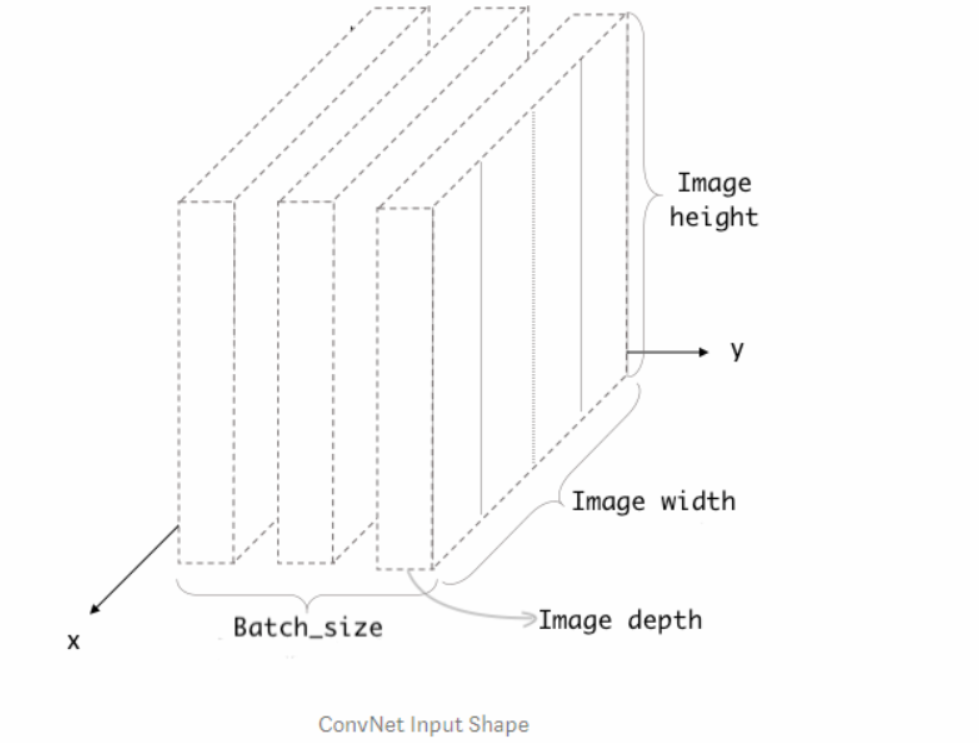

In [46]:
x=np.expand_dims(x,axis=0)

In [47]:
x.ndim

4

In [48]:
x.shape

(1, 64, 64, 3)

In [49]:
pred=model.predict(x)

1/1 [==============================] - 1s 739ms/step


In [50]:
pred

array([[0., 0., 1., 0.]], dtype=float32)

In [ ]:
{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [51]:
pred_class=np.argmax(pred,axis=1)

In [53]:
pred_class[0]

2

In [54]:
index=['bears', 'crows', 'elephants', 'rats']
result=str(index[pred_class[0]])

In [55]:
result

'elephants'